## HOUSE PRICE PREDICTION

A new real estate company is trying to enter the market but they are confused on how much they should sell their house, because they do not want to sell at unreasonable price, to stay competitive in the market they don’t want to sell to high or low .There is need to hire a data scientist to develop a model to predict price of houses based on the historical data.




# AIMS AND OBJECTIVES OF THE PROJECT

1.	How can they reduce the cost of producing houses and make more profit from the houses they will build.

2.	Set a reasonable price for their houses by predicting what future houses they haven't produce yet will cost during construction and also for sales to their clients.

3.	Identify the most suitable lands for building properties, retail shops, malls, and wetlands. Real estate investors can obtain information about it beforehand to determine whether it is worth investing in a property or not.






## APPROACH TO SOLVE THE PROBLEM

In this machine learning project I will use supervised learning because our data is labelled. Then use Regression algorithm, then under this method will we use Multiple Linear Regression, Decision Tree Regressor, Random Forest Regressor

## Why the Approach

Price is our target or dependent variable y and it is continous or numerical values. In Regression our target is always continous or numerical.

## import the necessary libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Reading the Data

In [ ]:
from google.colab import files
house=files.upload()

Saving kc_house_data.csv to kc_house_data (1).csv


In [ ]:
house=pd.read_csv("kc_house_data.csv")
house

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [ ]:
house.shape

(21613, 21)

In [ ]:
house.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [ ]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [ ]:
house.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [ ]:
house.corr()

<ipython-input-14-dea6bbb23e39>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  house.corr()


,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016762,0.001286,0.005160,-0.012258,-0.132109,0.018525,-0.002721,0.011592,-0.023783,0.008130,-0.010842,-0.005151,0.021380,-0.016907,-0.008224,-0.001891,0.020799,-0.002901,-0.138798
price,-0.016762,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,0.054012,0.126434,-0.053203,0.307003,0.021626,0.585379,0.082447
bedrooms,0.001286,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,-0.152668,-0.008931,0.129473,0.391638,0.029244
bathrooms,0.005160,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,-0.203866,0.024573,0.223042,0.568634,0.087175
sqft_living,-0.012258,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223,0.756420,0.183286
sqft_lot,-0.132109,0.089661,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,-0.129574,-0.085683,0.229521,0.144608,0.718557
floors,0.018525,0.256794,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419,0.279885,-0.011269
waterfront,-0.002721,0.266369,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703
view,0.011592,0.397293,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575
condition,-0.023783,0.036362,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,0.003026,-0.014941,-0.106500,-0.092824,-0.003406


from the table ,bathrooms,sqft_living,grade,sqft_above they are good predictor of price because they have high correlation with price

## **Visualizing the relationship**

# comparing bathrooms and price

Text(0.5, 1.0, 'Price vs bathrooms')

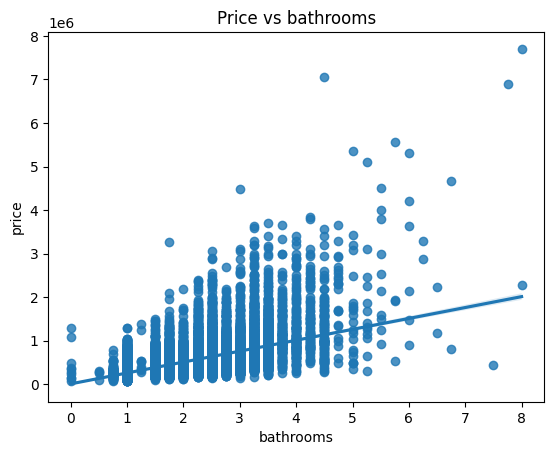

In [ ]:
sns.regplot(x="bathrooms",y="price",data=house)
plt.title("Price vs bathrooms")

There is moderate positive relationship between price and bathroom, that means increase in bathroom will lead bto increase in price

# comparing sqft_living and price

Text(0.5, 1.0, 'Price vs sqft_living')

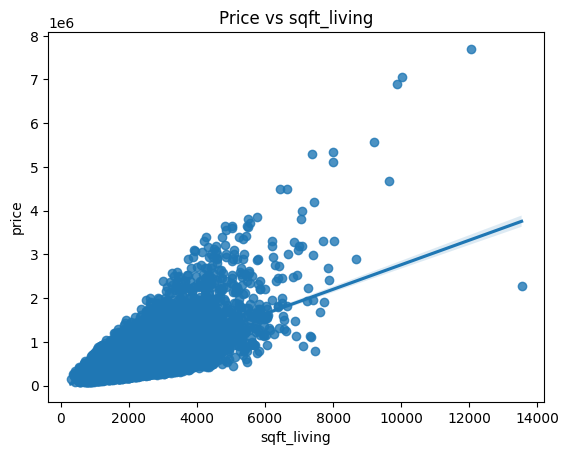

In [ ]:
sns.regplot(x="sqft_living",y="price",data=house)
plt.title("Price vs sqft_living")

 There is a very strong positive relationship between sqft_living and price

There is a weak positive relationship between grade and price

<ipython-input-17-7fc51318703f>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(house["price"])


<Axes: xlabel='price', ylabel='Density'>

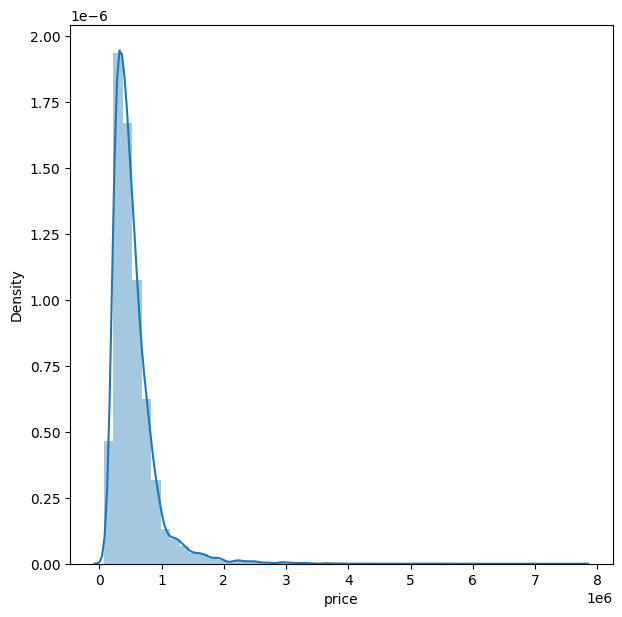

In [ ]:
plt.figure(figsize=(7,7))
sns.distplot(house["price"])

In [ ]:
house.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
21608    False
21609    False
21610    False
21611    False
21612    False
Length: 21613, dtype: bool

In [ ]:
house.drop_duplicates()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


{'whiskers': [<matplotlib.lines.Line2D at 0x78a4de43e680>,
 'caps': [<matplotlib.lines.Line2D at 0x78a4de43ebc0>,
 'boxes': [<matplotlib.lines.Line2D at 0x78a4de43e3e0>],
 'medians': [<matplotlib.lines.Line2D at 0x78a4de43f100>],
 'fliers': [<matplotlib.lines.Line2D at 0x78a4de43f3a0>],
 'means': []}

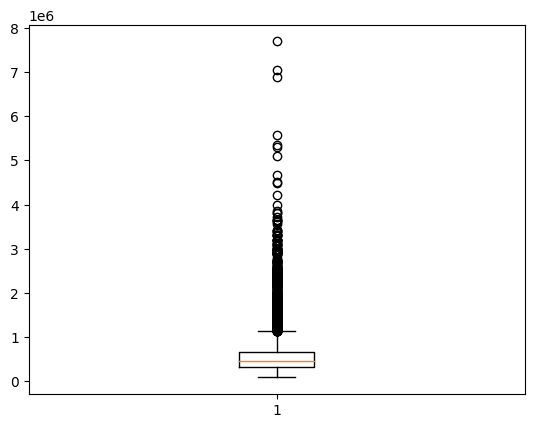

In [ ]:
plt.boxplot(house["price"])

There is presence of outliers in the data

In [ ]:
# Calculate the z-scores of the data
z_scores = np.abs((house['price'] - house['price'].mean()) / house['price'].std())

# Set a threshold for the z-scores
threshold = 3

# Remove the outliers from the DataFrame
house= house.drop(house[z_scores > threshold].index)

# Print the DataFrame without outliers
print(house)

               id             date     price  bedrooms  bathrooms  \
0      7129300520  20141013T000000  221900.0         3       1.00   
1      6414100192  20141209T000000  538000.0         3       2.25   
2      5631500400  20150225T000000  180000.0         2       1.00   
3      2487200875  20141209T000000  604000.0         4       3.00   
4      1954400510  20150218T000000  510000.0         3       2.00   
...           ...              ...       ...       ...        ...   
21608   263000018  20140521T000000  360000.0         3       2.50   
21609  6600060120  20150223T000000  400000.0         4       2.50   
21610  1523300141  20140623T000000  402101.0         2       0.75   
21611   291310100  20150116T000000  400000.0         3       2.50   
21612  1523300157  20141015T000000  325000.0         2       0.75   

       sqft_living  sqft_lot  floors  waterfront  view  ...  grade  \
0             1180      5650     1.0           0     0  ...      7   
1             2570      7242   

## Spliting the data into X and Y

In [ ]:
house.shape

(21207, 21)

In [ ]:
x=house[['bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
           ]]
y=house['price']

## **Data Scaling**

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc_x=sc.fit_transform(x)
sc_x

array([[-0.38390236, -1.47365973, -1.0178681 , ..., -0.66010414,
        -0.54407881, -0.20445809],
       [-0.38390236,  0.22184606,  0.64255902, ...,  0.28029831,
        -0.68067782,  4.87870431],
       [-1.46927994, -1.47365973, -1.50763438, ..., -0.66010414,
        -1.29537336, -0.20445809],
       ...,
       [-1.46927994, -1.81276089, -1.2089964 , ..., -0.66010414,
         1.30000782, -0.20445809],
       [-0.38390236,  0.56094722, -0.51615631, ..., -0.66010414,
         1.12925906, -0.20445809],
       [-1.46927994, -1.81276089, -1.2089964 , ..., -0.66010414,
         1.26585807, -0.20445809]])

## **Model Development**

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30)

## Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
LR=LinearRegression()

#training the model
LR.fit(x_train,y_train)

LinearRegression()

In [ ]:
LR_pred=LR.predict(x_test)
LR_pred

array([212201.61183659, 334390.26971046, 502992.9857492 , ...,
       437900.86423467, 630031.2834781 , 601899.36706529])

## DECISION TREE REGRESSOR

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
Dtc=DecisionTreeRegressor()

In [ ]:
Dtc.fit(x_train,y_train)

DecisionTreeRegressor()

In [ ]:
Dtc_pred=Dtc.predict(x_test)
Dtc_pred

array([185000., 410000., 329800., ..., 572500., 765000., 740000.])

## Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
rfr=RandomForestRegressor()


In [ ]:
rfr.fit(x_train,y_train)

RandomForestRegressor()

In [ ]:
rfr_pred=rfr.predict(x_test)

In [ ]:
rfr_pred

array([206596.5 , 365488.  , 422939.77, ..., 502569.67, 736139.64,
       588669.38])

## **EVALUATING THE MODEL**

In [ ]:
#importing the libraries
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

# Mean square Error

In [ ]:
mse_LR=mean_squared_error(LR_pred,y_test)
mse_Dtc=mean_squared_error(Dtc_pred,y_test)
mse_rfr=mean_squared_error(rfr_pred,y_test)
print("mean_squared_error of Linear Regression:",mse_LR)
print("mean_squared_error of Decision Tree Regressor :",mse_Dtc)
print("mean_squared_error of Random Forest Regressor:",mse_rfr)




mean_squared_error of Linear Regression: 31620672494.922623
mean_squared_error of Decision Tree Regressor : 56213414884.71051
mean_squared_error of Random Forest Regressor: 29025870186.514164


Random Forest has the lowest Mean squared error , the model with the lowest mse is better

## Mean Absolute Error

In [ ]:
mae_LR=mean_absolute_error(LR_pred, y_test)
mae_Dtc=mean_absolute_error(Dtc_pred, y_test)
mae_rfr=mean_absolute_error(rfr_pred, y_test)
print("mean_absolute_error of Linear Regression:",mae_LR)
print("mean_absolute_error of Decision Tree Regressor:",mae_Dtc)
print("mean_absolute_error of Random Forest Regressor:",mae_rfr)


mean_absolute_error of Linear Regression: 133381.9979772736
mean_absolute_error of Decision Tree Regressor: 169231.5954738331
mean_absolute_error of Random Forest Regressor: 124938.45194461971


Random Forest Regressor has the lowest Mean Absolute error,that means Random Forest is the best

## R Squared

In [ ]:
score_LR=r2_score(LR_pred, y_test)
score_Dtc=r2_score(Dtc_pred, y_test)
score_rfr=r2_score(rfr_pred, y_test)
print("r2_score of Linear Regression:",score_LR)
print("r2_score Decision Tree Regressor:",score_Dtc)
print("r2_score Random Forest Regressor:",score_rfr)

r2_score of Linear Regression: 0.14146325211871147
r2_score Decision Tree Regressor: 0.19198866104312795
r2_score Random Forest Regressor: 0.30538072723615506


Considering the R squared Random Forest Classifier has the score of 84% i.e it explain 85 variability in the data

# Evaluating the model Visually

## Multiple Regression

Text(0, 0.5, 'Actual Values')

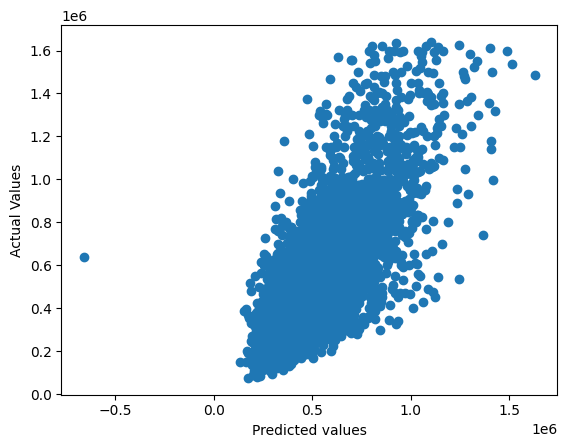

In [ ]:
plt.scatter(LR_pred,y_test)
plt.xlabel("Predicted values")
plt.ylabel("Actual Values")


Text(0, 0.5, 'Actual Values')

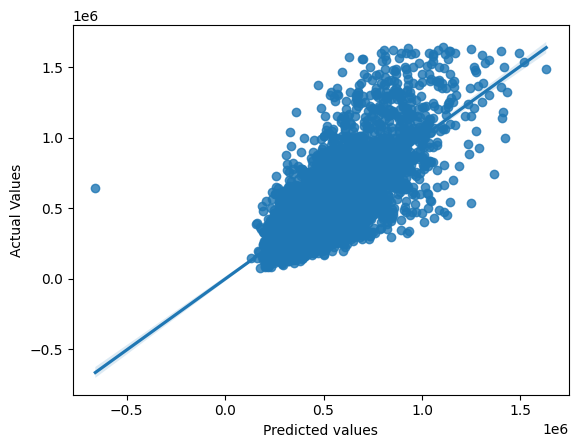

In [ ]:
sns.regplot(x=LR_pred,y=y_test)
plt.xlabel("Predicted values")
plt.ylabel("Actual Values")
















# Decision Tree Regressor

Text(0, 0.5, 'Actual Values')

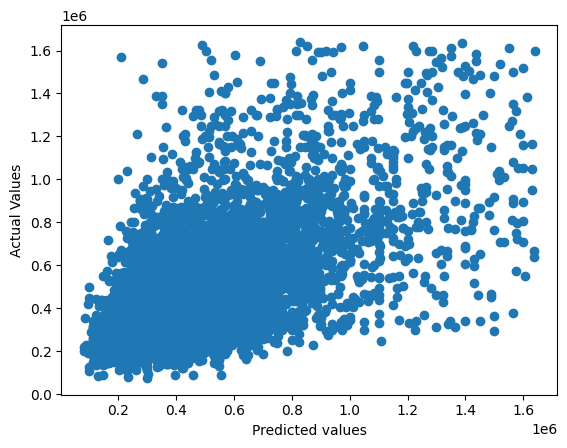

In [ ]:
plt.scatter(Dtc_pred, y_test)
plt.xlabel("Predicted values")
plt.ylabel("Actual Values")


Text(0, 0.5, 'Actual Values')

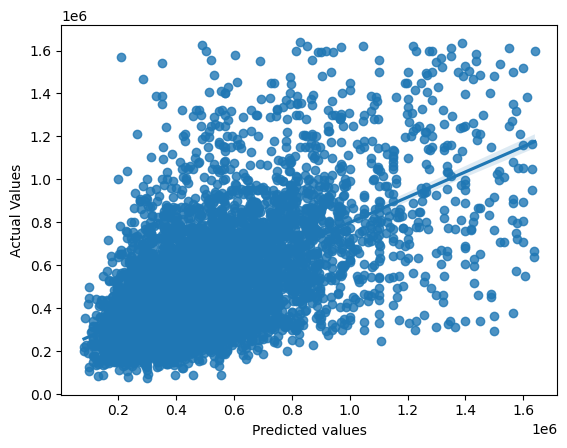

In [ ]:
sns.regplot(x=Dtc_pred,y=y_test)
plt.xlabel("Predicted values")
plt.ylabel("Actual Values")


## Random Forest Regressor

Text(0, 0.5, 'Actual Values')

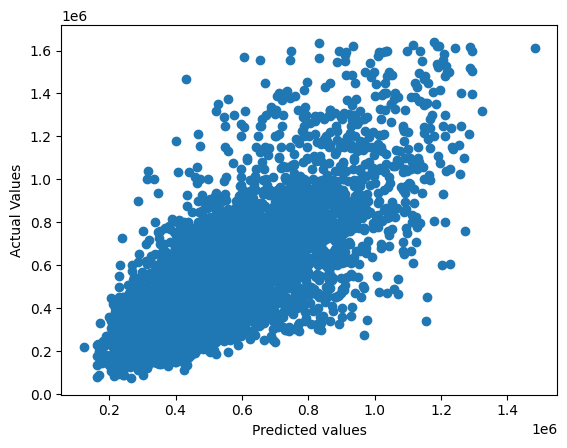

In [ ]:
plt.scatter(rfr_pred, y_test)
plt.xlabel("Predicted values")
plt.ylabel("Actual Values")


Text(0, 0.5, 'Actual Values')

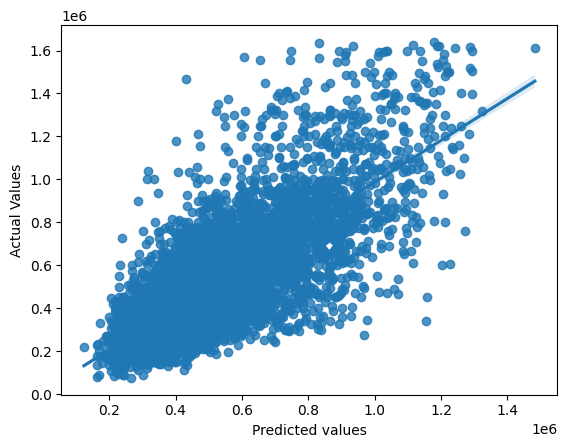

In [ ]:
sns.regplot(x=rfr_pred,y=y_test)
plt.xlabel("Predicted values")
plt.ylabel("Actual Values")


## Distributiion plot of Multiple Regression

<ipython-input-47-41935bad99b0>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(house['price'], hist=False, color="r", label="Actual Value")
<ipython-input-47-41935bad99b0>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(LR_pred, hist=False, color="b", label="Fitted Val

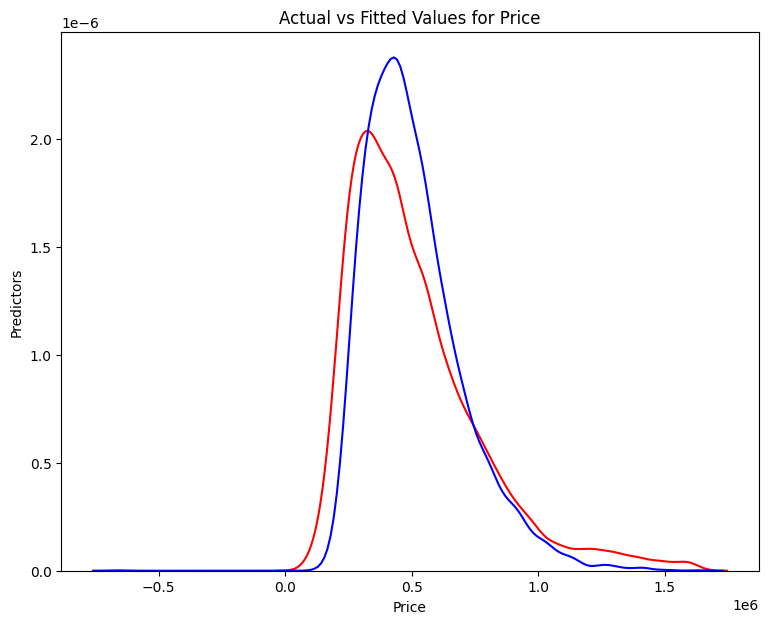

In [ ]:
plt.figure(figsize=(9, 7))
ax1 = sns.distplot(house['price'], hist=False, color="r", label="Actual Value")
sns.distplot(LR_pred, hist=False, color="b", label="Fitted Values" , ax=ax1)
plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price')
plt.ylabel('Predictors')
plt.show()
plt.close()

## Distribution plot of Decision Tree Regressor

<ipython-input-48-c6163f6146e4>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(house['price'], hist=False, color="r", label="Actual Value")
<ipython-input-48-c6163f6146e4>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Dtc_pred, hist=False, color="b", label="Fitted Va

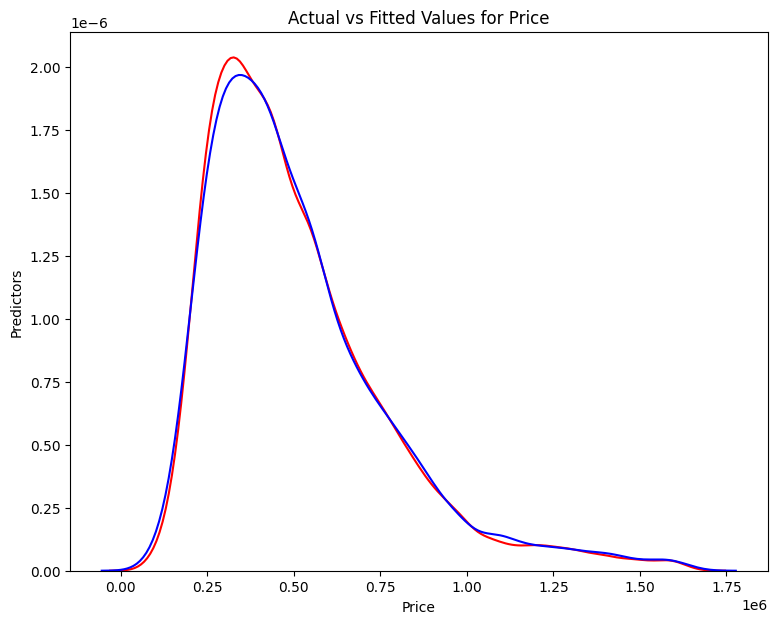

In [ ]:
plt.figure(figsize=(9, 7))
ax1 = sns.distplot(house['price'], hist=False, color="r", label="Actual Value")
sns.distplot(Dtc_pred, hist=False, color="b", label="Fitted Values" , ax=ax1)
plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price')
plt.ylabel('Predictors')
plt.show()
plt.close()

## Random Forest Regressor

<ipython-input-49-a80b2069bef1>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(house['price'], hist=False, color="r", label="Actual Value")
<ipython-input-49-a80b2069bef1>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(rfr_pred, hist=False, color="b", label="Fitted Va

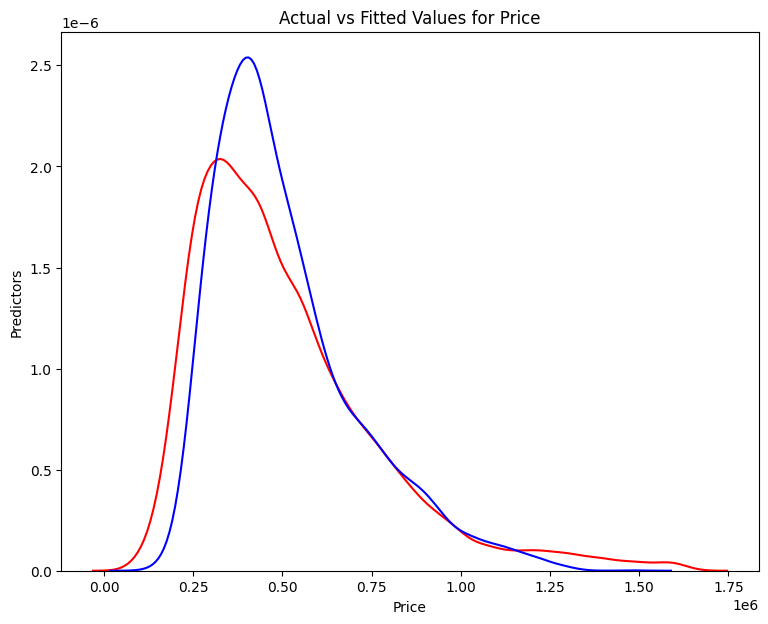

In [ ]:
plt.figure(figsize=(9, 7))
ax1 = sns.distplot(house['price'], hist=False, color="r", label="Actual Value")
sns.distplot(rfr_pred, hist=False, color="b", label="Fitted Values" , ax=ax1)
plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price')
plt.ylabel('Predictors')
plt.show()
plt.close()

## **DECISION MAKING AND CONCLUSION**

Considering mean_squared_error,mean_absolute_error,r2_score Random Forest Regressor is the best model for our data because it has the lowest MSE,MAE and highest R squared

# **Predicting the model on a new data with Random Forest Regressor**

In [ ]:
#new mobile data
new_house_price=(4,5,7,78,9,10,9,78,56,67,90,10)
array_new_data=np.asarray(new_house_price)
# reshape the data
reshape_new_data=array_new_data.reshape(1,-1)
#making the prediction
scale_new_data=sc.fit_transform(reshape_new_data)
print(scale_new_data)
Random_Forest=rfr.predict(reshape_new_data)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [ ]:
Random_Forest

array([233215.41])

1.	How can they reduce the cost of producing houses and make more profit from the houses they will build.

2.	Set a reasonable price for their houses by predicting what future houses they haven't produce yet will cost during construction and also for sales to their clients.

3.	Identify the most suitable lands for building properties, retail shops, malls, and wetlands. Real estate investors can obtain information about it beforehand to determine whether it is worth investing in a property or not.

4.	Obtaining a clean market entry with zero or minimum loss within next 3 years.



## ANSWER TO THE ANALYTICAL QUESTIONS

1.Using correlation coefficeint it is evident that bathrooms,sqft_living,grade,sqft_above are the most important predictor of price ,therefore to reduce cost of producing houses more emphasis should be placed on increasing these features inplace of others that does not really have impact on house prices

2.Random Forest Regressor has been used to develop a model to predict house prices on a new dataset

 3.Most houses around latitude 47.2 to 47.5 are cheaper so it is advisable for an investor to buy land or houses around that area.

#NEW PREDICTION AND MODEL DEPLOYMENT


In [ ]:
# Initialize and train the Random Forest Regressor
rfr = RandomForestRegressor(n_estimators=100, random_state=0)
rfr.fit(x_train, y_train)

RandomForestRegressor(random_state=0)

In [ ]:
#import Standard Scaler
scaler=StandardScaler()

In [ ]:
# Fit the scaler to the training data and transform the training data
X_train_scaled = scaler.fit_transform(x_train)

In [ ]:
import pickle
# Save the trained model using pickle
with open('rfr_model.pkl', 'wb') as model_file:
    pickle.dump(rfr, model_file)

# Load the trained model
with open('rfr_model.pkl', 'rb') as model_file:
    loaded_rfr = pickle.load(model_file)

#import Standard Scaler
scaler=StandardScaler()
# New data for prediction
new_data = np.random.rand(1, 12)  # Replace this with your own new data

# Scale the new data using the same scaler
new_data_scaled = scaler.fit_transform(new_data)


# Making the prediction using the loaded model
new_pred = loaded_rfr.predict(new_data)



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [ ]:
print("Predicted target:", new_pred)

Predicted target: [241860.66]
